## test cuda available

In [1]:
 
import torch
print('torch version:',torch.__version__)
print('cuda version:',torch.version.cuda)
if torch.cuda.is_available():
    print('cuda available')
else:
    print('cuda unavailable')
print('muti device count:', torch.cuda.device_count())


torch version: 2.1.2+cu118
cuda version: 11.8
cuda available
muti device count: 4


In [6]:
import torch
input = torch.tensor([[1, 2], [3, 4], [5, 6]])
index = torch.tensor([[0, 1], [1, 2]])
# (0->1,0)(0->1,1) , (1->1,0)(1->2,1) 
output = torch.gather(input, dim=0, index=index)
print(output)

index = torch.tensor([[0, 1, 1], [1, 0, 0], [1, 1, 0]])
# (0,0)(0,1)(0,1) , (1,0->1)(1,1->0)(1,1->0) , (2,0->1)(2,1->1)（2，2->0)
output = torch.gather(input, dim=1, index=index)
print(output)

tensor([[1, 4],
        [3, 6]])
tensor([[1, 2, 2],
        [4, 3, 3],
        [6, 6, 5]])


In [8]:
def extract(v, t, x_shape):
    """
    Extract some coefficients at specified timesteps, then reshape to
    [batch_size, 1, 1, 1, 1, ...] for broadcasting purposes.
    """
    device = t.device
    out = torch.gather(v, index=t, dim=0).float().to(device)
    print ([t.shape[0]] + [1] * (len(x_shape) - 1))
    return out.view([t.shape[0]] + [1] * (len(x_shape) - 1))
v = torch.tensor([1, 2, 3, 4, 5])
t = torch.tensor([0, 2, 4])
out = extract(v, t, x_shape=(len(t),))
print(out.shape)
print(out)

[3]
torch.Size([3])
tensor([1., 3., 5.])


In [9]:
import torch.nn.functional as F
import torch

alphas_bar = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5])
T = 3

alphas_bar_prev = F.pad(alphas_bar, [1, 0], value=1)[:T]

print(alphas_bar_prev.shape)  
print(alphas_bar_prev)        

torch.Size([3])
tensor([1.0000, 0.1000, 0.2000])


In [11]:
import torch  

n_T = 10
batch_size = 4
_ts = torch.randint(1, n_T + 1, (batch_size,))
print('_ts.shape:',_ts.shape) 

beta2 = 0.02
beta1 = 1e-4
beta_t = (beta2 - beta1) * torch.arange(0, n_T + 1, dtype=torch.float32) / n_T + beta1
sqrt_beta_t = torch.sqrt(beta_t)
alpha_t = 1 - beta_t
log_alpha_t = torch.log(alpha_t)
alphabar_t = torch.cumsum(log_alpha_t, dim=0).exp()
sqrtab = torch.sqrt(alphabar_t)
oneover_sqrta = 1 / torch.sqrt(alpha_t)
sqrtmab = torch.sqrt(1 - alphabar_t)
mab_over_sqrtmab_inv = (1 - alpha_t) / sqrtmab
print('beta_t.shape',beta_t.shape)

x = torch.randn((batch_size,3,32,32))
eps = torch.randn_like(x)
print('x.shape:',x.shape)
print('eps.shape:',eps.shape)
print('sqrtab_extract.shape',sqrtab[_ts, None, None, None].shape)
x_t = (
    sqrtab[_ts, None, None, None] * x
    + sqrtmab[_ts, None, None, None] * eps
) 
print('x_t.shape',x_t.shape)

simple_i = 5
_ti = torch.tensor(simple_i/n_T).repeat(batch_size,1) # repeat(*sizes)函数可以将一个张量在指定的维度上重复多次
print('_ti.shape:',_ti.shape,'\n_ti:',_ti)

_ts.shape: torch.Size([4])
beta_t.shape torch.Size([11])
x.shape: torch.Size([4, 3, 32, 32])
eps.shape: torch.Size([4, 3, 32, 32])
sqrtab_extract.shape torch.Size([4, 1, 1, 1])
x_t.shape torch.Size([4, 3, 32, 32])
_ti.shape: torch.Size([4, 1]) 
_ti: tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]])


In [2]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 208.7 kB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.3 kB/s eta 0:00:0000:0100:09
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 38.8 kB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 44.5 kB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.1 kB/s eta 0:00:0000:0100:02
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [8]:
import datetime
import os
folder_name = datetime.datetime.now().strftime("%Y-%m-%d-%H:%M:%S")
print(folder_name)
folder_path = os.path.join("extra",folder_name)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)


2024-05-08-20:17:55


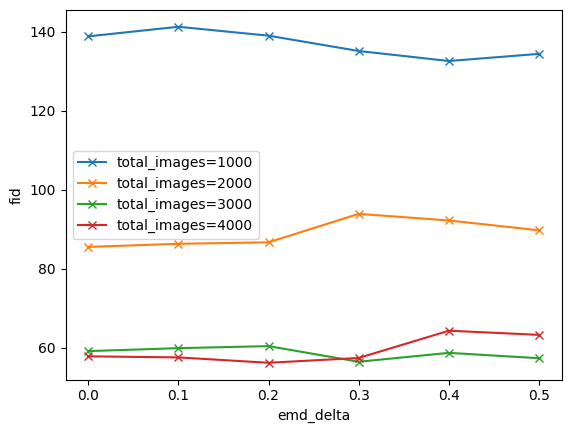

In [2]:
# python -m pytorch_fid extra/fed_emd/2024-05-09-00:19:50/emd/dst extra/fed_emd/2024-05-09-00:19:50/emd/src --device=cuda:2
# python -m pytorch_fid extra/fed_emd/2024-05-09-01:45:48/emd/dst extra/fed_emd/2024-05-09-01:45:48/emd/src --device=cuda:2
emd_data = {
    1000:
    [
        [0.0,275.60],
        [0.1,284.96],
        [0.2,283.51],
        [0.3,279.67], 
        [0.4,283.78],
        [0.5,295.02],
    ],
    2000:
    [
        [0.0,263.34], # emd_delta, fid
        [0.1,270.30],
        [0.2,272.30],
        [0.3,283.09], 
        [0.4,290.25],
        [0.5,310.25], 
    ],
    4000:
    [
        [0.0,258.24],
        [0.1,264.30],
        [0.2,268.04], 
        [0.3,270.12],
        [0.4,279.17],
        [0.5,280.81],
           
    ]
}
emd_data = {
    1000:
        [
            [0.0,138.83], # emd_delta, fid
            [0.1,141.25], 
            [0.2,139.00],
            [0.3,135.12], 
            [0.4,132.59],
            [0.5,134.4], # 121.81
        ],
    2000:
        [
            [0.0,85.56], # emd_delta, fid
            [0.1,86.34], 
            [0.2,86.72],
            [0.3,93.92], 
            [0.4,92.24],
            [0.5,89.76],
        ],
    3000:
        [
            [0.0,59.19], # emd_delta, fid
            [0.1,59.94], 
            [0.2,60.46],
            [0.3,56.50], 
            [0.4,58.75],
            [0.5,57.39],
        ],
    4000:
        [
            [0.0,57.87], # 57.87
            [0.1,57.60], # 57.60
            [0.2,56.24], # 56.24
            [0.3,57.46], # 59.06 57.46
            [0.4,64.36], # 59.83
            [0.5,63.30], # 64.42
        ]
}
emd_data = {
    1000:
        [
            [0.0,], # 310.25
            [0.15,], # 309.92
            [0.3,], # 312.02
            [0.5,] #  312.04
        ],
        
}
# 使用plt绘制emd_data的点图并使用曲线拟合,x轴为emd_delta,y轴为fid
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
plt.xlabel('emd_delta')
plt.ylabel('fid')
for key in emd_data.keys():
    emd_data[key] = np.array(emd_data[key])
    plt.plot(emd_data[key][:,0],emd_data[key][:,1],label=f"total_images={key}",marker='x')
    plt.legend()

{0.0: [[1000, 138.83], [2000, 85.56], [3000, 59.19], [4000, 57.87]], 0.1: [[1000, 141.25], [2000, 86.34], [3000, 59.94], [4000, 57.6]], 0.2: [[1000, 139.0], [2000, 86.72], [3000, 60.46], [4000, 56.24]], 0.3: [[1000, 135.12], [2000, 93.92], [3000, 56.5], [4000, 57.46]], 0.4: [[1000, 132.59], [2000, 92.24], [3000, 58.75], [4000, 64.36]], 0.5: [[1000, 134.4], [2000, 89.76], [3000, 57.39], [4000, 63.3]]}


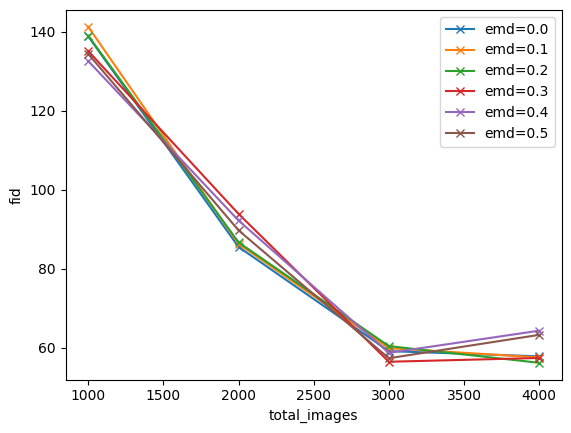

In [3]:


trans_data = {}
total_images = [k for k in emd_data.keys()]
for i in range(len(emd_data[total_images[0]])): # 0.1 ,0.2 ,0.3
    emd = emd_data[total_images[0]][i][0]
    # print("emd:",emd)
    trans_data[emd] = []
    for total_image in total_images: # 2000, 4000
        # print("total_image:",total_image)
        trans_data[emd].append([total_image,emd_data[total_image][i][1]])
print(trans_data)
# 使用plt绘制trans_data的点图并使用曲线拟合,x轴为数据量,y轴为fid,不同曲线代表不同emd
plt.xlabel('total_images')
plt.ylabel('fid')
for key in trans_data.keys():
    trans_data[key] = np.array(trans_data[key])
    plt.plot(trans_data[key][:,0],trans_data[key][:,1],label=f"emd={key}",marker='x')
    plt.legend()